In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
oku = Dataset('11June/wLDA/mode_040000L_20120611_220000V_NAA_obj.nc','r')
oku_wo = Dataset('11June/woLDA/mode_040000L_20120611_220000V_NAA_obj.nc','r')

In [3]:
lat = oku['lat']
lat = np.asarray(lat)

lon = oku['lon']
lon = np.asarray(lon)

# Rainfall Fcst Objects

In [4]:
#Read data from the wLDA MODE outputs
fcst_obj_raw = oku['fcst_obj_raw']
fcst_obj_raw = np.asarray(fcst_obj_raw)

fcst_clus_id = oku['fcst_clus_id']
fcst_clus_id = np.asarray(fcst_clus_id)

#Create an array from the wLDA MODE outputs
fcst_obj = []
for i in range(0,len(lat),1):
    for j in range(0,len(lon),1):
        if fcst_clus_id[i,j] == 2:
            #print(fcst_obj_raw[i,j]/1000,",")
            fcst_obj.append(fcst_obj_raw[i,j])#/1000)
            
fcst_obj = np.asarray(fcst_obj)

In [5]:
#Read data from the woLDA MODE outputs
fcst_obj_raw_wo = oku_wo['fcst_obj_raw']
fcst_obj_raw_wo = np.asarray(fcst_obj_raw_wo)

fcst_clus_id_wo = oku_wo['fcst_clus_id']
fcst_clus_id_wo = np.asarray(fcst_clus_id_wo)

#Create an array from the woLDA MODE outputs
fcst_obj_wo = []
for i in range(0,len(lat),1):
    for j in range(0,len(lon),1):
        if fcst_clus_id_wo[i,j] == 1:
            #print(fcst_obj_raw[i,j]/1000,",")
            fcst_obj_wo.append(fcst_obj_raw_wo[i,j])#/1000)

fcst_obj_wo = np.asarray(fcst_obj_wo)

# Rainfall Obs Objects

In [6]:
obs_obj_raw = oku['obs_obj_raw']
obs_obj_raw = np.asarray(obs_obj_raw)

obs_clus_id = oku['obs_clus_id']
obs_clus_id = np.asarray(obs_clus_id)

In [7]:
obs_obj = []
for i in range(0,len(lat),1):
    for j in range(0,len(lon),1):
        if obs_clus_id[i,j] == 2:
            #print(obs_obj_raw[i,j]/1000,",")
            obs_obj.append(obs_obj_raw[i,j])#/1000)

In [8]:
obs_obj = np.asarray(obs_obj)

# Histograms

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

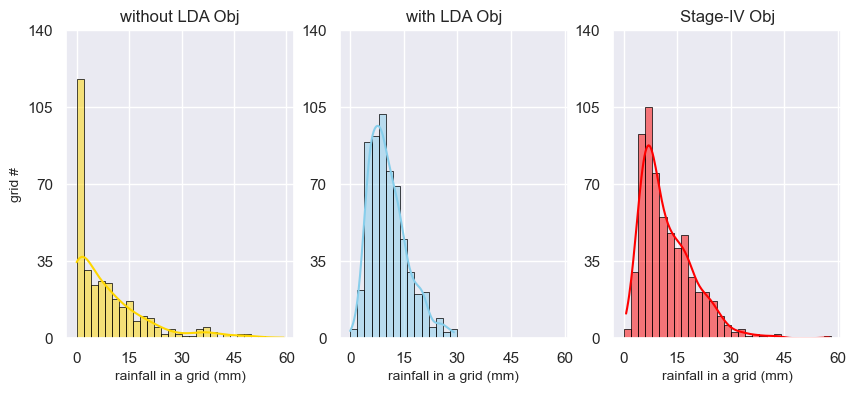

In [10]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")
df = sns.load_dataset("iris")

fig, axs = plt.subplots(1, 3, figsize=(10,4))

#plt.xlabel("rainfall in a grid (mm)")
#plt.ylabel("grid #")

newBins = range(0, 60, 2)

sns.histplot(data=fcst_obj_wo, kde=True, color="gold",   edgecolor = "black",  bins=newBins, ax=axs[0]).set(title='without LDA Obj')
sns.histplot(data=fcst_obj,     kde=True, color="skyblue",edgecolor = "black", bins=newBins,  ax=axs[1]).set(title='with LDA Obj')
sns.histplot(data=obs_obj,     kde=True, color="red",    edgecolor = "black",  bins=newBins, ax=axs[2]).set(title='Stage-IV Obj')

# Set label for x-axis
axs[0].set_xlabel( "rainfall in a grid (mm)" , size = 10 )
axs[1].set_xlabel( "rainfall in a grid (mm)" , size = 10 )
axs[2].set_xlabel( "rainfall in a grid (mm)" , size = 10 )

# Set label for y-axis
axs[0].set_ylabel( "grid #" , size = 10 )
axs[1].set_ylabel( "" , size = 10 )
axs[2].set_ylabel( "" , size = 10 )

# Set x-ticks
axs[0].set_xticks(np.linspace(start=0, stop=60, num=5))
axs[1].set_xticks(np.linspace(start=0, stop=60, num=5))
axs[2].set_xticks(np.linspace(start=0, stop=60, num=5))

# Set y-ticks
axs[0].set_yticks(np.linspace(start=0, stop=140, num=5))
axs[1].set_yticks(np.linspace(start=0, stop=140, num=5))
axs[2].set_yticks(np.linspace(start=0, stop=140, num=5))

plt.show()


# Box Plot

/var/folders/6q/xnyw39p55t36lq81ys2l3b_80000gn/T/ipykernel_28435/1368060748.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df = np.asarray(df)


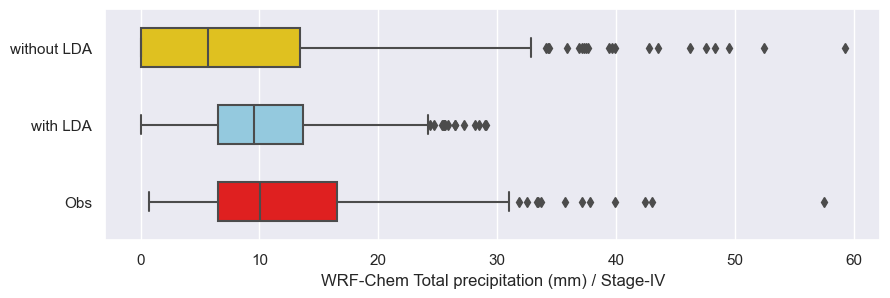

In [11]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset("iris")
plt.rcParams["figure.figsize"] = [10.00, 3.0]

#create your own color array
#my_colors = ["#00ffff","#7cfc00","#ff0000"]
my_colors = ["gold","skyblue","red"]
# add color array to set_palette
# function of seaborn
sns.set_palette( my_colors )

space = []
space = np.asarray(space)

#sns.set(style="darkgrid")
df = [fcst_obj_wo, fcst_obj, obs_obj]
df = np.asarray(df)

objects = ["without LDA","with LDA", "Obs"]

ax = sns.boxplot(data=df, width=0.5, orient="h")
ax.set(xlabel='WRF-Chem Total precipitation (mm) / Stage-IV')
ax.set_yticklabels(objects)
plt.show()

# CTH objects

In [12]:
oku_cth     = Dataset('11June/2012-06-11_22:00.wLDA.nc','r')
oku_cth_wo  = Dataset('11June/2012-06-11_22:00.woLDA.nc','r')
oku_cth_obs = Dataset('11June/GOES13_CTH.nc','r')

In [13]:
cth = oku_cth['CTH']
cth = np.asarray(cth)

cth_wo = oku_cth_wo['CTH']
cth_wo = np.asarray(cth_wo)

cth_obs = oku_cth_obs['GOES13_CTH'][0,:,:]
cth_obs = np.asarray(cth_obs)

In [14]:
cth_obj = []
for i in range(0,len(lat),1):
    for j in range(0,len(lon),1):
        if fcst_clus_id[i,j] == 2:
            cth_obj.append(cth[i,j])#/1000)

cth_obj = np.asarray(cth_obj)

In [15]:
cth_obj_wo = []
for i in range(0,len(lat),1):
    for j in range(0,len(lon),1):
        if fcst_clus_id_wo[i,j] == 1:
            cth_obj_wo.append(cth_wo[i,j])#/1000)

cth_obj_wo = np.asarray(cth_obj_wo)

In [16]:
cth_obj_obs = []
for i in range(0,len(lat),1):
    for j in range(0,len(lon),1):
        if obs_clus_id[i,j] == 2:
            cth_obj_obs.append(cth_obs[i,j])#/1000)

cth_obj_obs = np.asarray(cth_obj_obs)

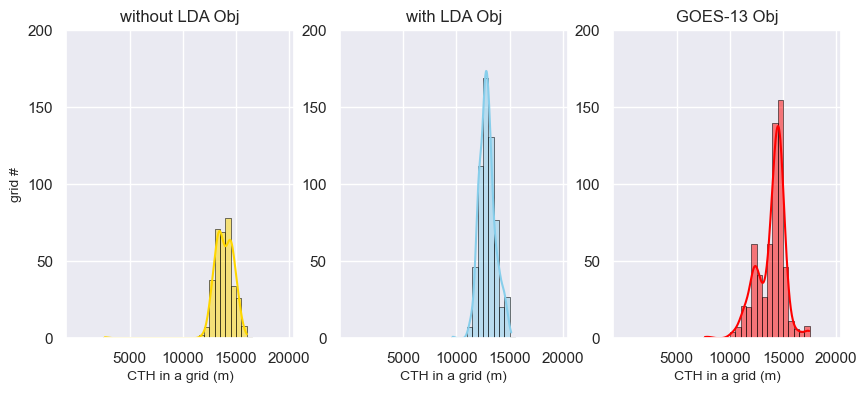

In [17]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")
df = sns.load_dataset("iris")

fig, axs = plt.subplots(1, 3, figsize=(10,4))

#plt.xlabel("rainfall in a grid (mm)")
#plt.ylabel("grid #")

newBins = range(0, 20000, 500)

sns.histplot(data=cth_obj_wo,  kde=True, color="gold",   edgecolor = "black",  bins=newBins,   ax=axs[0]).set(title='without LDA Obj')
sns.histplot(data=cth_obj,     kde=True, color="skyblue",edgecolor = "black",  bins=newBins,   ax=axs[1]).set(title='with LDA Obj')
sns.histplot(data=cth_obj_obs, kde=True, color="red",    edgecolor = "black",  bins=newBins,   ax=axs[2]).set(title='GOES-13 Obj')


# Set label for x-axis
axs[0].set_xlabel( "CTH in a grid (m)" , size = 10 )
axs[1].set_xlabel( "CTH in a grid (m)" , size = 10 )
axs[2].set_xlabel( "CTH in a grid (m)" , size = 10 )

# Set label for y-axis
axs[0].set_ylabel( "grid #" , size = 10 )
axs[1].set_ylabel( "" , size = 10 )
axs[2].set_ylabel( "" , size = 10 )

# Set x-ticks
axs[0].set_xticks(np.linspace(start=5000, stop=20000, num=4))
axs[1].set_xticks(np.linspace(start=5000, stop=20000, num=4))
axs[2].set_xticks(np.linspace(start=5000, stop=20000, num=4))

# Set y-ticks
axs[0].set_yticks(np.linspace(start=0, stop=200, num=5))
axs[1].set_yticks(np.linspace(start=0, stop=200, num=5))
axs[2].set_yticks(np.linspace(start=0, stop=200, num=5))

plt.show()

/var/folders/6q/xnyw39p55t36lq81ys2l3b_80000gn/T/ipykernel_28435/480431869.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df = np.asarray(df)/1000


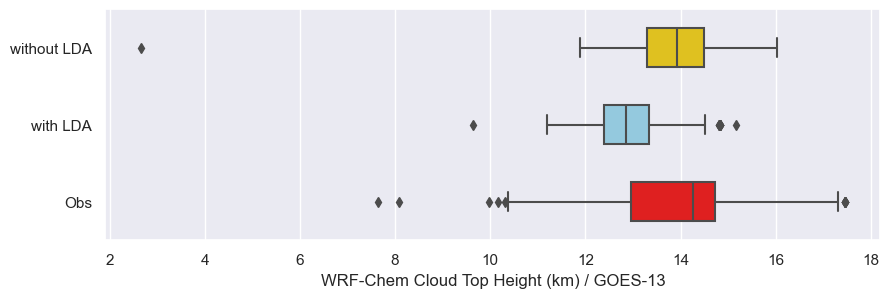

In [18]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset("iris")
plt.rcParams["figure.figsize"] = [10.00, 3.0]

#create your own color array
#my_colors = ["#00ffff","#7cfc00","#ff0000"]
my_colors = ["gold","skyblue","red"]
# add color array to set_palette
# function of seaborn
sns.set_palette( my_colors )
space = []
space = np.asarray(space)

#sns.set(style="darkgrid")
df = [cth_obj_wo, cth_obj, cth_obj_obs]
df = np.asarray(df)/1000

objects = ["without LDA","with LDA", "Obs"]

ax = sns.boxplot(data=df, width=0.5, orient="h")
ax.set(xlabel='WRF-Chem Cloud Top Height (km) / GOES-13')
ax.set_yticklabels(objects)
plt.show()